### 1. <서울> 지역 <남자> 유저들이  보낸 친구요청의 세그먼트별(나이 세그먼트, 점수 세그먼트) 일별 인당 친추수를 시각화

In [374]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [375]:
data_rec = pd.read_csv("./nrise/recommend_data.csv")
data_user = pd.read_csv("./nrise/user_data.csv")

### 데이터 확인 및 전처리

In [326]:
data_user = data_user.dropna(how = "all")

In [327]:
data_user.isna().sum()

user_id            0
gender             0
year_of_birth      1
device_type        0
timezone           0
location          31
blood_type         0
height             0
relative_score     0
dtype: int64

In [328]:
data_user= data_user.dropna(subset = ['year_of_birth','location'] )
data_user.isna().sum()

user_id           0
gender            0
year_of_birth     0
device_type       0
timezone          0
location          0
blood_type        0
height            0
relative_score    0
dtype: int64

In [329]:
data_rec.head()

,recommend_id,superlike_time,recommend_time,user_id,recommended_user_id,distance,chatroom_id,chatroom_time,other_accepted_time,joined_time
0,364501445,NaN,2019-06-01 00:00:07.952937+09,463794,413171,21018,NaN,NaN,NaN,NaN
1,364501446,NaN,2019-06-01 00:00:07.956678+09,463794,846939,10231,NaN,NaN,NaN,NaN
2,364501456,NaN,2019-06-01 00:00:08.351688+09,252853,423677,4331,NaN,NaN,NaN,NaN
3,364501457,NaN,2019-06-01 00:00:08.354742+09,252853,713767,723,NaN,NaN,NaN,NaN
4,364501482,NaN,2019-06-01 00:00:10.06174+09,877117,844048,3540,NaN,NaN,NaN,NaN


In [330]:
data_rec= data_rec.dropna(subset = ['superlike_time'] )

In [331]:
data_rec.head()

,recommend_id,superlike_time,recommend_time,user_id,recommended_user_id,distance,chatroom_id,chatroom_time,other_accepted_time,joined_time
18,364501944,2019-06-01 00:00:35.955569+09,2019-06-01 00:00:29.193332+09,131391,798071,1793,1738480.0,2019-06-01 00:00:35.956531+09,NaN,NaN
26,364502096,2019-06-01 00:55:30.600444+09,2019-06-01 00:00:34.555325+09,847246,341284,9975,1739145.0,2019-06-01 00:55:30.601385+09,NaN,NaN
54,364502776,2019-06-01 00:03:27.31418+09,2019-06-01 00:00:58.08705+09,868431,685382,4306,1738522.0,2019-06-01 00:03:27.315344+09,NaN,NaN
61,364502838,2019-06-01 08:01:10.938069+09,2019-06-01 00:00:59.476376+09,798843,877598,1013,1740939.0,2019-06-01 08:01:10.939065+09,2019-06-01 08:05:34.634228+09,2019-06-01 08:05:48.337271+09
88,364503522,2019-06-01 14:03:36.526749+09,2019-06-01 00:01:18.836137+09,399854,308182,1002,1744234.0,2019-06-01 14:03:36.528261+09,2019-06-01 22:52:29.697914+09,2019-06-10 07:07:50.276088+09


In [332]:
data_user.head()

,user_id,gender,year_of_birth,device_type,timezone,location,blood_type,height,relative_score
0,439300,1,1997.0,0,Asia/Seoul,경기도 화성시,AB,156,80.965062
1,809516,0,1993.0,0,Asia/Seoul,경기도 광주시,B,170,61.000000
2,878589,0,1998.0,1,Asia/Seoul,서울 서초구,A,181,0.171371
3,841519,0,1998.0,1,Asia/Seoul,충청남도 태안군,A,178,52.530527
4,857841,0,1999.0,1,Asia/Seoul,경기도 화성시,O,177,83.000000


In [333]:
#나이 추가
from datetime import date
data_user['age'] = date.today().year- data_user['year_of_birth']

#연령 카테고리 추가
data_user.loc[data_user['age'] < 10, 'age_band'] = 'kid'
data_user.loc[(data_user['age'] >= 10) & (data_user['age'] < 20) , 'age_band'] = '10'
data_user.loc[(data_user['age'] >= 20) & (data_user['age'] < 25) , 'age_band'] = '20-'
data_user.loc[(data_user['age'] >= 25) & (data_user['age'] < 30) , 'age_band'] = '20+'
data_user.loc[(data_user['age'] >= 30) & (data_user['age'] < 35) , 'age_band'] = '30-'
data_user.loc[(data_user['age'] >= 35) & (data_user['age'] < 40) , 'age_band'] = '30+'
data_user.loc[(data_user['age'] >= 40) & (data_user['age'] < 45) , 'age_band'] = '40-'
data_user.loc[(data_user['age'] >= 45) & (data_user['age'] < 50) , 'age_band'] = '40+'
data_user.loc[(data_user['age'] >= 50) & (data_user['age'] < 60) , 'age_band'] = '50'
data_user.loc[(data_user['age'] >= 60) , 'age_band'] = 'elder'

In [334]:
data_user.head()

,user_id,gender,year_of_birth,device_type,timezone,location,blood_type,height,relative_score,age,age_band
0,439300,1,1997.0,0,Asia/Seoul,경기도 화성시,AB,156,80.965062,24.0,20-
1,809516,0,1993.0,0,Asia/Seoul,경기도 광주시,B,170,61.000000,28.0,20+
2,878589,0,1998.0,1,Asia/Seoul,서울 서초구,A,181,0.171371,23.0,20-
3,841519,0,1998.0,1,Asia/Seoul,충청남도 태안군,A,178,52.530527,23.0,20-
4,857841,0,1999.0,1,Asia/Seoul,경기도 화성시,O,177,83.000000,22.0,20-


In [335]:
data_user_seoul = data_user[data_user['location'].str.contains('서울')] ## 서울에 사는 user

data_user_30_seoul_male = data_user_seoul[data_user_seoul['gender'] == 0] ## 남성 user
                                                 

In [336]:
data_user_30_seoul_male.head()

,user_id,gender,year_of_birth,device_type,timezone,location,blood_type,height,relative_score,age,age_band
2,878589,0,1998.0,1,Asia/Seoul,서울 서초구,A,181,0.171371,23.0,20-
20,557921,0,1990.0,0,Asia/Seoul,서울 강서구,B,176,56.000000,31.0,30-
21,767320,0,1992.0,1,Asia/Seoul,서울 동대문구,B,179,2.000000,29.0,20+
44,884454,0,1992.0,0,Asia/Seoul,서울 은평구,B,175,53.641026,29.0,20+
47,863518,0,1990.0,0,Asia/Seoul,서울 강남구,AB,175,53.758877,31.0,30-


In [337]:
#서울에 사는 30대 남성의 추천 데이터
df = pd.merge(data_rec, data_user_30_seoul_male, left_on='user_id', right_on='user_id', how='inner')
df.head()

,recommend_id,superlike_time,recommend_time,user_id,recommended_user_id,distance,chatroom_id,chatroom_time,other_accepted_time,joined_time,gender,year_of_birth,device_type,timezone,location,blood_type,height,relative_score,age,age_band
0,364502838,2019-06-01 08:01:10.938069+09,2019-06-01 00:00:59.476376+09,798843,877598,1013,1740939.0,2019-06-01 08:01:10.939065+09,2019-06-01 08:05:34.634228+09,2019-06-01 08:05:48.337271+09,0,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-
1,365165612,2019-06-01 12:20:13.409672+09,2019-06-01 12:19:11.333284+09,798843,860165,1143,1743159.0,2019-06-01 12:20:13.410696+09,NaN,NaN,0,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-
2,365648152,2019-06-01 18:11:42.29387+09,2019-06-01 18:11:22.70707+09,798843,691839,538,1746625.0,2019-06-01 18:11:42.295414+09,NaN,NaN,0,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-
3,367932846,2019-06-02 21:30:53.681845+09,2019-06-02 21:27:52.675488+09,798843,883447,1267,1763246.0,2019-06-02 21:30:53.682919+09,NaN,NaN,0,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-
4,367932847,2019-06-02 23:02:27.519715+09,2019-06-02 21:27:52.679732+09,798843,434738,862,1764671.0,2019-06-02 23:02:27.5208+09,NaN,NaN,0,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-


In [338]:
df.describe()

,recommend_id,user_id,recommended_user_id,distance,chatroom_id,gender,year_of_birth,device_type,height,relative_score,age
count,2.909000e+03,2909.000000,2909.000000,2909.000000,2.909000e+03,2909.0,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000
mean,3.682168e+08,650636.724304,718159.122723,3065.708491,1.766002e+06,0.0,1992.184600,0.329323,176.532142,39.452618,28.815400
std,2.205580e+06,256593.068276,231495.593476,4190.809223,1.688607e+04,0.0,4.240771,0.470048,5.169089,30.059848,4.240771
min,3.645028e+08,9700.000000,1019.000000,10.000000,1.738509e+06,0.0,1981.000000,0.000000,140.000000,0.000000,21.000000
25%,3.662601e+08,474786.000000,653715.000000,872.000000,1.752571e+06,0.0,1990.000000,0.000000,173.000000,16.464391,26.000000
50%,3.679554e+08,771523.000000,833107.000000,2281.000000,1.765214e+06,0.0,1993.000000,0.000000,176.000000,32.731395,28.000000
75%,3.699555e+08,860759.000000,877318.000000,4049.000000,1.779367e+06,0.0,1995.000000,1.000000,180.000000,61.217953,31.000000
max,3.721245e+08,892326.000000,891937.000000,82828.000000,2.055685e+06,0.0,2000.000000,1.000000,200.000000,460.248668,40.000000


In [339]:
#점수별 5분위로 분류
df['point_rank'] = pd.qcut(df.relative_score, q=5, labels= ['A','B','C','D','E'])

In [340]:
df.head()

,recommend_id,superlike_time,recommend_time,user_id,recommended_user_id,distance,chatroom_id,chatroom_time,other_accepted_time,joined_time,...,year_of_birth,device_type,timezone,location,blood_type,height,relative_score,age,age_band,point_rank
0,364502838,2019-06-01 08:01:10.938069+09,2019-06-01 00:00:59.476376+09,798843,877598,1013,1740939.0,2019-06-01 08:01:10.939065+09,2019-06-01 08:05:34.634228+09,2019-06-01 08:05:48.337271+09,...,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-,D
1,365165612,2019-06-01 12:20:13.409672+09,2019-06-01 12:19:11.333284+09,798843,860165,1143,1743159.0,2019-06-01 12:20:13.410696+09,NaN,NaN,...,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-,D
2,365648152,2019-06-01 18:11:42.29387+09,2019-06-01 18:11:22.70707+09,798843,691839,538,1746625.0,2019-06-01 18:11:42.295414+09,NaN,NaN,...,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-,D
3,367932846,2019-06-02 21:30:53.681845+09,2019-06-02 21:27:52.675488+09,798843,883447,1267,1763246.0,2019-06-02 21:30:53.682919+09,NaN,NaN,...,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-,D
4,367932847,2019-06-02 23:02:27.519715+09,2019-06-02 21:27:52.679732+09,798843,434738,862,1764671.0,2019-06-02 23:02:27.5208+09,NaN,NaN,...,1989.0,0,Asia/Seoul,서울 강남구,A,177,55.0,32.0,30-,D


In [341]:
#rank별 분포도 확인
df.point_rank.value_counts().to_frame().style.background_gradient(cmap ='summer')

,point_rank
D,621
B,585
A,583
C,579
E,541


In [345]:
#친구 추천 시간 일별로 변환 후 user별 일당 평균 추천수 확인
from pandas import Series, DataFrame
df["superlike_day"]=df["superlike_time"].str[0:10]

df_count = df.groupby(['user_id'])['superlike_time'].count().to_frame().reset_index()

df_count['frq_day'] = df_count['superlike_time']
df_count.drop(['superlike_time'], axis = 1, inplace =True)
df_count.head()

df_count.describe()

,user_id,frq_day
count,1297.000000,1297.000000
mean,664570.916731,2.242868
std,253027.342336,2.235118
min,9700.000000,1.000000
25%,517746.000000,1.000000
50%,781784.000000,1.000000
75%,864224.000000,3.000000
max,892326.000000,21.000000


In [346]:
df = pd.merge(df, df_count, left_on='user_id', right_on='user_id', how='inner')

In [348]:
df.drop_duplicates(['user_id'])

,recommend_id,superlike_time,recommend_time,user_id,recommended_user_id,distance,chatroom_id,chatroom_time,other_accepted_time,joined_time,...,timezone,location,blood_type,height,relative_score,age,age_band,point_rank,superlike_day,frq_day
0,364502838,2019-06-01 08:01:10.938069+09,2019-06-01 00:00:59.476376+09,798843,877598,1013,1740939.0,2019-06-01 08:01:10.939065+09,2019-06-01 08:05:34.634228+09,2019-06-01 08:05:48.337271+09,...,Asia/Seoul,서울 강남구,A,177,55.000000,32.0,30-,D,2019-06-01,9
9,364503642,2019-06-01 00:02:38.468577+09,2019-06-01 00:01:21.145978+09,433982,822995,226,1738509.0,2019-06-01 00:02:38.469693+09,NaN,NaN,...,Asia/Seoul,서울 동대문구,B,180,44.185116,27.0,20+,D,2019-06-01,2
11,364504569,2019-06-01 00:06:10.920351+09,2019-06-01 00:01:42.148432+09,753643,877827,559,1738568.0,2019-06-01 00:06:10.921332+09,2019-06-01 00:47:45.227309+09,NaN,...,Asia/Seoul,서울 강남구,O,179,12.674046,25.0,20+,A,2019-06-01,1
12,364506785,2019-06-01 00:03:29.912082+09,2019-06-01 00:02:23.828733+09,599475,866894,657,1738523.0,2019-06-01 00:03:29.913389+09,2019-06-01 23:26:31.580392+09,NaN,...,Asia/Seoul,서울 성동구,O,178,25.000000,27.0,20+,B,2019-06-01,2
14,364507367,2019-06-01 00:04:15.867722+09,2019-06-01 00:02:36.526381+09,878634,877515,1374,1738537.0,2019-06-01 00:04:15.86912+09,NaN,NaN,...,Asia/Seoul,서울 강서구,B,180,66.000000,38.0,30+,E,2019-06-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,372074859,2019-06-04 23:38:17.7372+09,2019-06-04 23:34:59.979508+09,872956,690145,709,1789888.0,2019-06-04 23:38:17.738212+09,NaN,NaN,...,Asia/Seoul,서울 강북구,O,174,33.679648,38.0,30+,C,2019-06-04,1
2905,372093272,2019-06-04 23:44:59.668787+09,2019-06-04 23:44:04.756342+09,462823,743623,1299,1789986.0,2019-06-04 23:44:59.669913+09,NaN,NaN,...,Asia/Seoul,서울 송파구,B,186,89.309149,32.0,30-,E,2019-06-04,1
2906,372092647,2019-06-05 00:19:32.557348+09,2019-06-04 23:43:47.029355+09,892326,828911,4267,1790409.0,2019-06-05 00:19:32.558495+09,NaN,NaN,...,Asia/Seoul,서울 광진구,B,174,65.000000,25.0,20+,D,2019-06-05,1
2907,372095886,2019-06-04 23:45:56.781765+09,2019-06-04 23:45:30.233446+09,892310,874164,4943,1789993.0,2019-06-04 23:45:56.782937+09,NaN,NaN,...,Asia/Seoul,서울 영등포구,A,176,54.708293,26.0,20+,D,2019-06-04,1


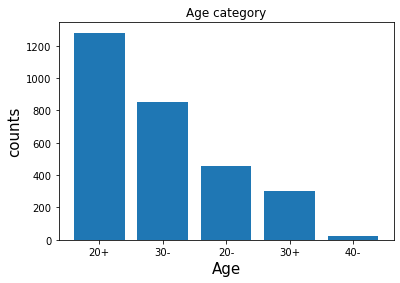

In [352]:
#age category
plt.bar(df['age_band'].value_counts().index,df['age_band'].value_counts())
plt.title("Age category")
plt.xlabel('Age', fontsize = 15)
plt.ylabel("counts", fontsize = 15)
plt.show()

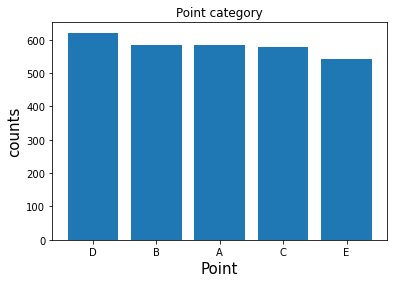

In [353]:
#points category
plt.bar(df['point_rank'].value_counts().index,df['point_rank'].value_counts())
plt.title("Point category")
plt.xlabel('Point', fontsize = 15)
plt.ylabel("counts", fontsize = 15)
plt.show()

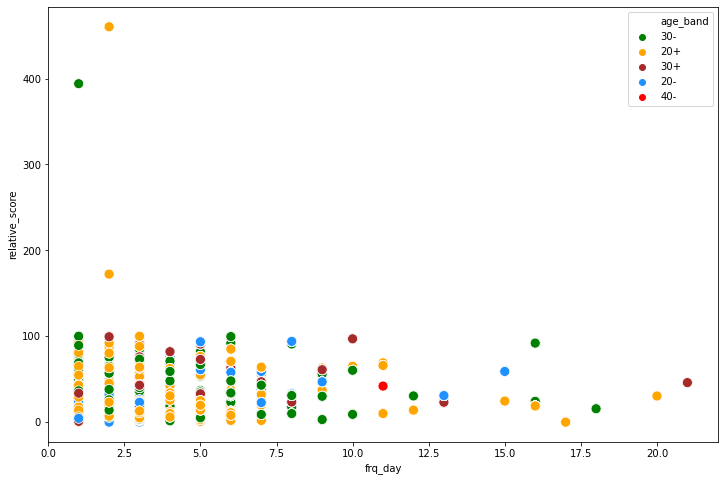

In [373]:
#연령대별 추천수와 점수의 관계
import seaborn as sns
fig = plt.figure(figsize=(12, 8))
g =sns.scatterplot(x="frq_day", y="relative_score", hue="age_band",
              data=df, 
                    palette=['green','orange','brown','dodgerblue','red'], s=100, legend='full')